KONIEC 26.09.2019 19:47:11

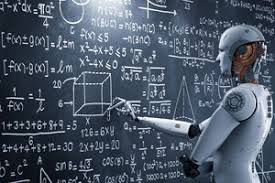

źródło danych: https://archive.ics.uci.edu/ml/machine-learning-databases/00222/

opis danych
## Dane klienta banku
 1 - age (numerycznie)
 
 2 - job: rodzaj pracy (kategorycznie: „admin.”, „Pracownik fizyczny”, „przedsiębiorca”, „pokojówka”, „zarządzanie”, „emerytowany”, „samozatrudniony”, „ usługi ”,„ student ”,„ technik ”,„ bezrobotny ”,„ nieznany ”)
 
 3 - marital: stan cywilny (kategorycznie:„ rozwiedziony ”,„ żonaty ”,„ samotny ”,„ nieznany ”; uwaga:„ rozwiedziony ”oznacza rozwiedziony lub owdowiały)
 
 4 - education (kategoryczne: „podstawowy. 4 lata”, „podstawowy. 6 lat”, „podstawowy. 9 lat”, „szkoła średnia”, „analfabeta”, „kurs zawodowy”, „uniwersytet. stopień”, „nieznane”)
 
 5 - default: czy kredyt jest niespłacony? (kategorycznie: „nie”, „tak”, „nieznany”)
 
 6 - housing: ma kredyt mieszkaniowy? (kategorycznie: „nie”, „tak”, „nieznany”) 
 
 7 - loan: czy pożyczka osobista? (kategorycznie: „nie”, „tak”, „nieznany”)
#### Powiązane z ostatnim kontaktem bieżącej kampanii

8 - contact: typ komunikacji kontaktowej (kategorycznie: „komórkowy”, „telefon”)

9 - month: ostatni miesiąc kontaktowy w roku (kategorycznie: „jan”, „lut”, „mar”, ..., „lis”, „dec”)

10 - day_of_week: ostatni dzień tygodnia w tygodniu (kategorycznie: „pon”, „wt”, „środ”, „czw”, „pt”)

11 - duration: czas trwania ostatniego kontaktu, w sekundach (numerycznie) . Ważna uwaga: ten atrybut ma duży wpływ na docelowy 
wynik (np. Jeśli czas trwania = 0, to y = „nie”). Jednak czas trwania nie jest znany przed wykonaniem połączenia. Ponadto po zakończeniu połączenia y jest oczywiście znane. W związku z tym dane te należy uwzględnić wyłącznie do celów porównawczych i należy je odrzucić, jeżeli intencją jest stworzenie realistycznego modelu predykcyjnego.

#### Inne atrybuty

12 - campaign: liczba kontaktów wykonanych podczas tej kampanii i dla tego klienta (numerycznie, obejmuje ostatni kontakt)

13 - pdays: liczba dni, które upłynęły od ostatniego kontaktu klienta z poprzedniej kampanii (numerycznie; 999 oznacza, że 
klient nie był wcześniej skontaktowano się)

14 - previous: liczba kontaktów wykonanych przed tą kampanią i dla tego klienta (numerycznie)

15 - poutcome: wynik poprzedniej kampanii marketingowej (kategorycznie: „porażka”, „nieistniejąca”, „sukces”)

#### Atrybuty kontekstu społecznego i gospodarczego

16 - emp.var.rate: wskaźnik zmienności zatrudnienia - wskaźnik kwartalny (liczbowy)

17 - Cons.price.idx: wskaźnik cen konsumpcyjnych - wskaźnik miesięczny (liczbowy)

18 - cons.conf.idx: wskaźnik zaufania konsumentów - wskaźnik miesięczny (liczbowy )

19 - euribor3 mln: stawka 3-miesięczna euribor - wskaźnik dzienny (liczbowy)

20 - nr_employed: liczba zatrudnionych: liczba pracowników - wskaźnik kwartalny (liczbowy)

# Cel zadania 

- zaproponują grupy klientów (segmenty), dla których Dep. Marketingu opracuje odrębne skrypty rozmów i argumenty sprzedażowe

- przygotują model predykcyjny, na podstawie którego do kolejnej akcji sprzedażowej zostaną wyselekcjonowani klienci cechujący się najwyższym prawdopodobieństwem kupna produktu.

# 1. Pobranie danych i bibliotek

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import matplotlib.pylab as plt
from pylab import plot, show, subplot, specgram, imshow, savefig
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plote

df = pd.read_csv('c:/1/bank.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,age,job,marital,education,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,1,1,53,technician,married,unknown,no,no,no,cellular,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,2,2,28,management,single,university.degree,no,yes,no,cellular,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,3,3,39,services,married,high.school,no,no,no,cellular,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,4,4,55,retired,married,basic.4y,no,yes,no,cellular,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# 2. Sprawdzenie kompletność i formatu danych

In [2]:
df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

Dane są kompletne.Usuwam komórki śmieciowe.

In [3]:
del df['Unnamed: 0']
del df['Unnamed: 0.1']

Sprawdzam typ danych

In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

Wielkość bazy

In [5]:
df.shape

(41188, 21)

WYNIK 2: 
1. Dane są kompletne 2. Format prawidłowy 3.ilość 41188 wierszy, 21 kolumn

# 3. Sprawdzanie struktury danych

### 3.1 Tworze grupy kolumn danych ciągłych i danych dyskretnych

In [6]:
categorical_vars = df.describe(include=["object"]).columns
continuous_vars = df.describe().columns

In [7]:
continuous_vars

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [8]:
categorical_vars

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

Dane w połowie dyskretne w połowie ciągłe

### 3.2 Wizualizacja struktury

###### DANE CIĄGŁE

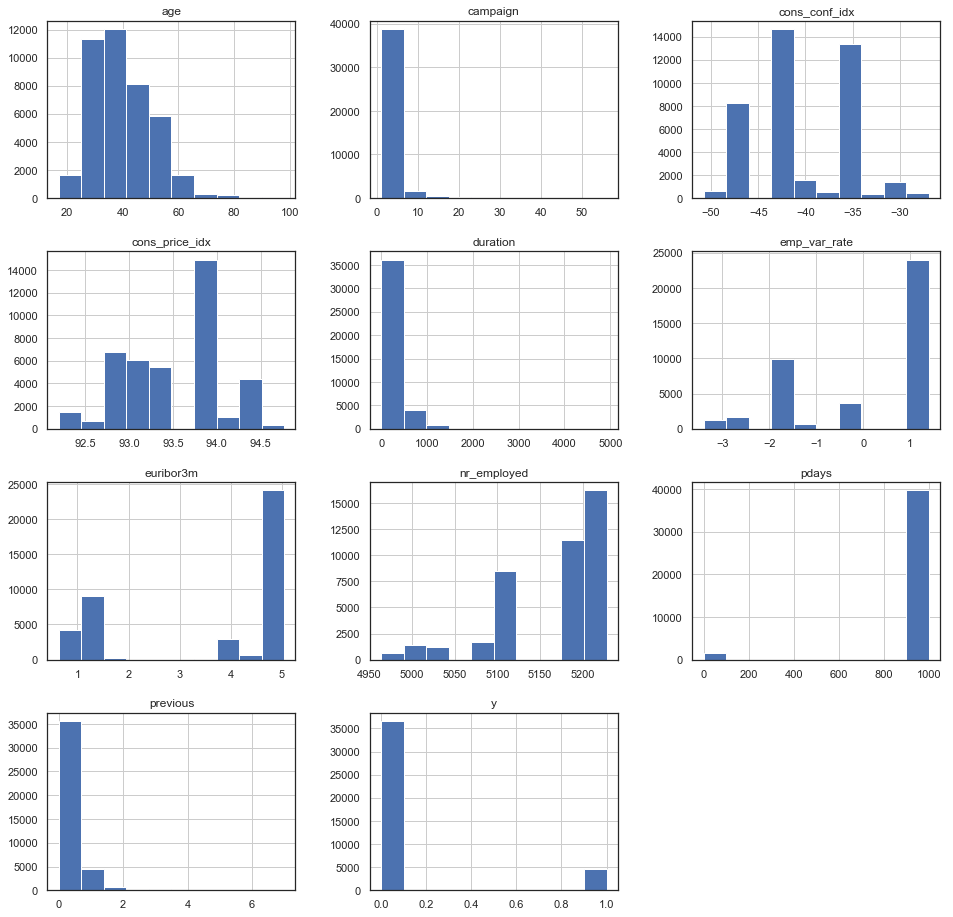

In [9]:
sns.set(style="white")
_ = df.hist(column=continuous_vars, figsize = (16,16))

##### DANE DYSKRETNE - WYŚWIETLAM ILOŚĆ DANYCH UNIKALNYCH W KAŻDEJ KATEGORII

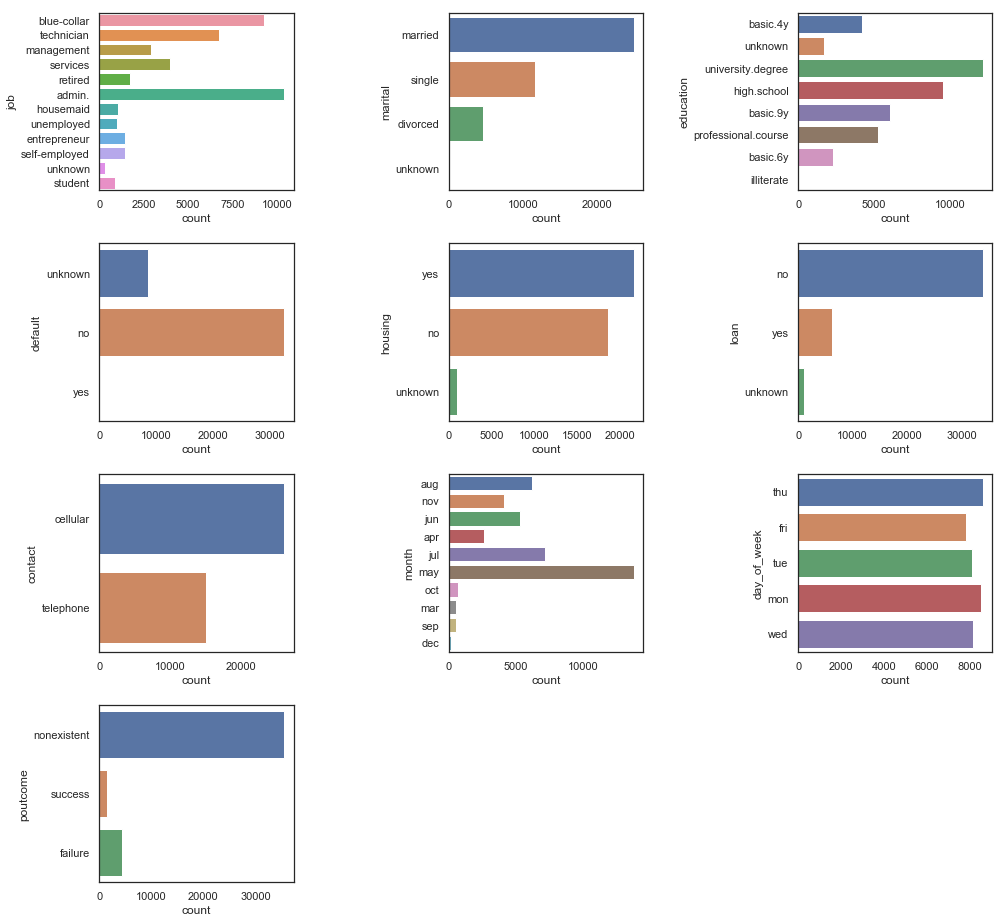

In [10]:
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
# robie przestrzeń między wykresami 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=0.3)
# pętla: mamy 9 zmiennych dyskretnych
for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=df, ax=ax)

###### Pomysły: 
- education [illiterate] przerobić na [unknown]
- job założyć nowe kategorie: aktywny/nieaktywny zawodowo. aktywny/młody aktywny/stary nieaktywny/młody nieaktywny 
- Bardzo duże niezbilansowanie w miesiącach zbadać zależność miesiąc z inną kategorią 
- znaleść kategorie które do siebie pasują i połączyć je w jedną kategorię

Pozycje df['education'] -illiterate daje do unknown

In [11]:
df['education'] = df['education'].str.replace('illiterate','unknown')

# 4. Analiza korelacji zmiennych ciągłych

### 4.1 Korelacja ze zmienną wynikową zmiennych ciągłych

In [12]:
CORREL = df.corr().sort_values('y')
CORREL['y'].to_frame().sort_values('y')

,y
nr_employed,-0.354678
pdays,-0.324914
euribor3m,-0.307771
emp_var_rate,-0.298334
cons_price_idx,-0.136211
campaign,-0.066357
age,0.030399
cons_conf_idx,0.054878
previous,0.230181
duration,0.405274


Text(0,0.5,'Zmienne nezależne ciągłe')

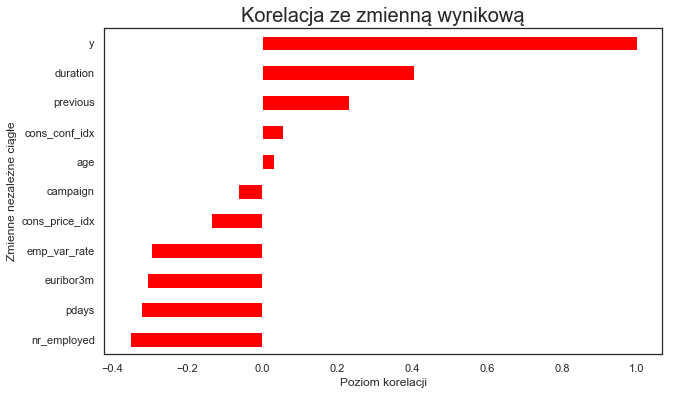

In [13]:
plt.figure(figsize=(10,6))
CORREL['y'].plot(kind='barh', color='red')
plt.title('Korelacja ze zmienną wynikową', fontsize=20)
plt.xlabel('Poziom korelacji')
plt.ylabel('Zmienne nezależne ciągłe')

### 4.2 Wykres macierzowy korelacji zmiennych ciągłych

Text(0.5,1,'Macierz korelacji ze zmienną wynikową y')

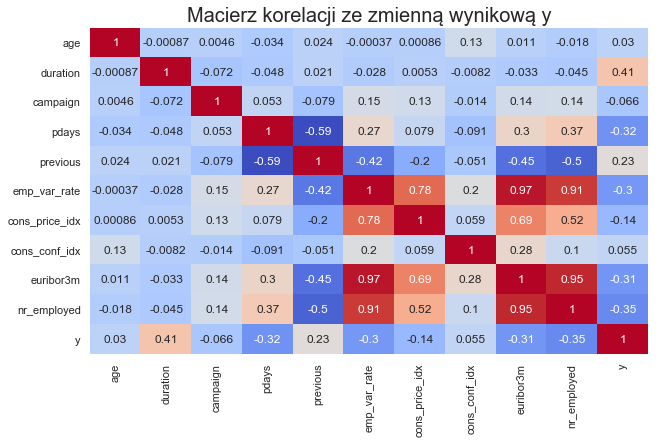

In [14]:
plt.figure(figsize=(10,6))
CORREL =df.corr()
sns.heatmap(CORREL, annot=True, cbar=False, cmap="coolwarm")
plt.title('Macierz korelacji ze zmienną wynikową y', fontsize=20)

Text(0.5,1,'Macierz korelacji posortowana według korelacji ze zmienną wynikową y')

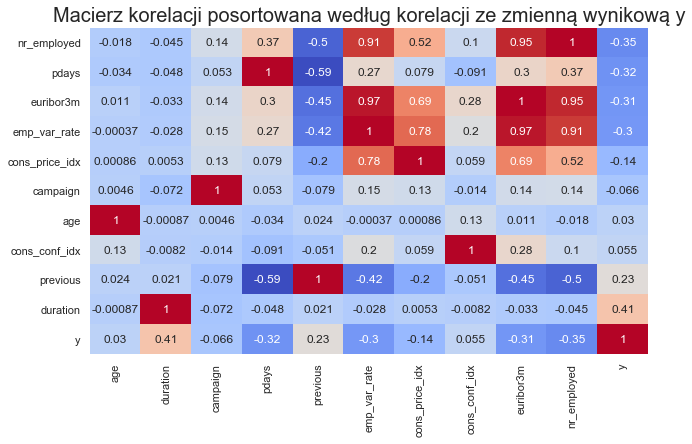

In [15]:
plt.figure(figsize=(10,6))
CORREL =df.corr().sort_values('y')
sns.heatmap(CORREL, annot=True, cbar=False, cmap="coolwarm")
plt.title('Macierz korelacji posortowana według korelacji ze zmienną wynikową y', fontsize=20)

# ZMIENNE CIĄGŁE - PRZYSTOSOWANIE DO REGRESJI LOGISTYCZNEJ

### 4.4 Analiza zaeżności poszczególnych dyskretnych zmiennych niezależnych

In [16]:
continuous_vars

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

# Age - grupa nie jest ciekawa ponieważ jest bardzo niski poziom korelacji ze zmienną wynikową 
# Niski poziom korelacji ze zmienną y = 0.03

Tworzę nową kolumne z 5 kategoriami wieku.

In [17]:
df['AA5_Grup_wiekowych'] = pd.qcut(df['age'],5)

In [18]:
df['AA5_Grup_wiekowych'].value_counts()

(16.999, 31.0]    9330
(35.0, 41.0]      8533
(41.0, 49.0]      8087
(49.0, 98.0]      8055
(31.0, 35.0]      7183
Name: AA5_Grup_wiekowych, dtype: int64

In [19]:
df['AA5_Grup_wiekowych'].value_counts(normalize=True)

(16.999, 31.0]    0.226522
(35.0, 41.0]      0.207172
(41.0, 49.0]      0.196344
(49.0, 98.0]      0.195567
(31.0, 35.0]      0.174395
Name: AA5_Grup_wiekowych, dtype: float64

In [20]:
df['AA5_Grup_wiekowych'] = df['AA5_Grup_wiekowych'].astype(object)

Analiza poziomu korelacji grup wiekowych pod kontem ewentualnego skasowania grupy lub zmiany grup.
Grupa wiekowa powyżej 60 lat stanowi 3% populacji lecz ma wysoki wskaźnik zakupów.

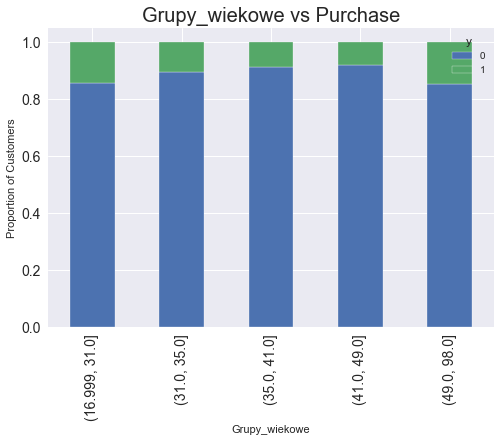

In [21]:
plt.style.use('seaborn')

table=pd.crosstab(df.AA5_Grup_wiekowych,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, fontsize=14)
plt.title('Grupy_wiekowe vs Purchase', fontsize=20)
plt.xlabel('Grupy_wiekowe')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

To był podział ręczny - teraz podizele klientów według wieku statystycznie

# duration: wysoki poziom korelacji ze zmienną y = 0.405274
# CZAS TRWANIA ROZMOWY TELEFONICZNEJ MA NAJWIĘKSZE ZNACZENIE PRZY WYNIKU SPRZEDAŻY
czas trwania ostatniego kontaktu, w sekundach (numerycznie) . Ważna uwaga: ten atrybut ma duży wpływ na docelowy wynik (np. Jeśli czas trwania = 0, to y = „nie”). Jednak czas trwania nie jest znany przed wykonaniem połączenia. Ponadto po zakończeniu połączenia y jest oczywiście znane. W związku z tym dane te należy uwzględnić wyłącznie do celów porównawczych i należy je odrzucić, jeżeli intencją jest stworzenie realistycznego modelu predykcyjnego.

### Wyrzucam wszystkie zdarzenia gdzie duration był 0 

In [22]:
df[df.duration==0]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,AA5_Grup_wiekowych
8976,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(35.0, 41.0]"
30156,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,0,"(49.0, 98.0]"
32502,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0,"(16.999, 31.0]"
36969,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0,"(49.0, 98.0]"


Kasuje wszystkie zdarzenia, kiedy nie było rozmowy duration=0

In [23]:
#df['duration'] = df['duration'].replace(0,np.nan)

Nikt nie rozmawia z klientami przez sekundy tylko przez minuty, dlatego przeliczam sekundy na minuty.

In [24]:
df['duration'] = df['duration']/60

Tworzę przedziały trwania rozmowy telefonicznej jako oddzielną kolumnę 

Analiza zależności minut do grup szczegółowych

In [25]:
df['CCzas_zaok'] = np.round(df['duration'], decimals=1)
df['CCzasy rozmów_40G'] = pd.qcut(df['CCzas_zaok'],40)

In [26]:
del df['CCzas_zaok']

In [27]:
#df['CCzasy rozmów_40G'].value_counts()

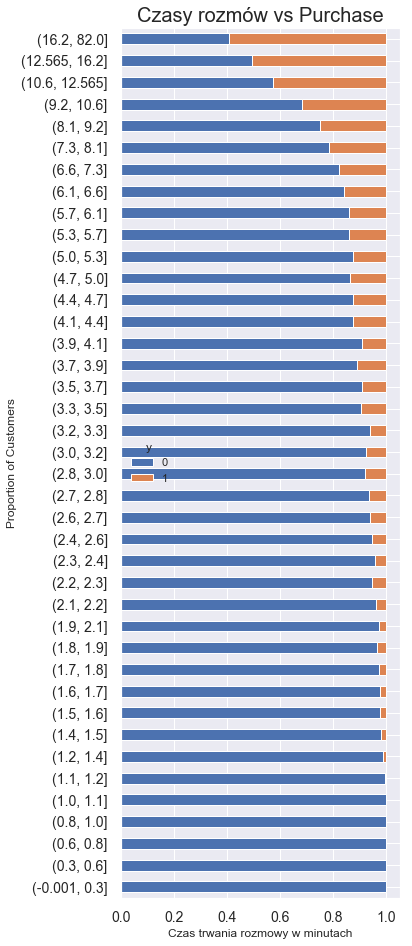

In [28]:
plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(5, 16)})
table=pd.crosstab(df['CCzasy rozmów_40G'],df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, fontsize=14)
plt.title('Czasy rozmów vs Purchase', fontsize=20)
plt.xlabel('Czas trwania rozmowy w minutach')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

Dzielimy grupę duration na 3 grupy:
- 'Rozmowa poniżej 3 minut', 
- 'Rozmowa 3-6 minut', 
- 'Rozmowa powyżej 6 minut'

In [29]:
lst = [df]
for column in lst:
    column.loc[column["duration"] < 3,  "AA_3Czasy_kontaktu"] = 'Rozmowa poniżej 3 minut'
    column.loc[(column["duration"] >= 3) & (column["duration"] <= 6), "AA_3Czasy_kontaktu"] = 'Rozmowa 3-6 minut'
    column.loc[column["duration"] >= 6, "AA_3Czasy_kontaktu"] = 'Rozmowa powyżej 6 minut'

Kasuje czas rozmów df['CCzasy rozmów_40G'] bo już mi nie jest otrzebny

In [30]:
del df['CCzasy rozmów_40G']

Stworzyłem grupę 3Czasy_rozmów która istotnie wpływa na wynik procesu 

Text(0,0.5,'Proportion of Customers')

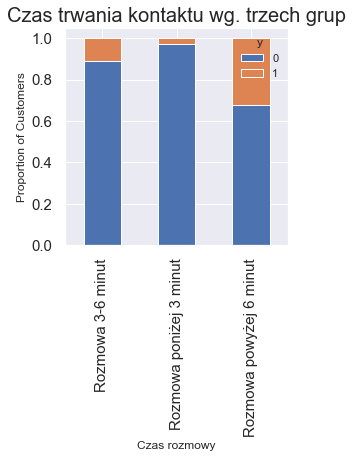

In [31]:
sns.set(style="white")
sns.set(rc={'figure.figsize':(4, 4)})
table=pd.crosstab(df['AA_3Czasy_kontaktu'],df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, fontsize=15)
plt.title('Czas trwania kontaktu wg. trzech grup', fontsize=20)
plt.xlabel('Czas rozmowy')
plt.ylabel('Proportion of Customers')


# previous:  wysoki poziom korelacji ze zmienną y = 0.230181
### liczba kontaktów wykonanych przed tą kampanią i dla tego klienta (numerycznie)

Text(0,0.5,'Proportion of Customers')

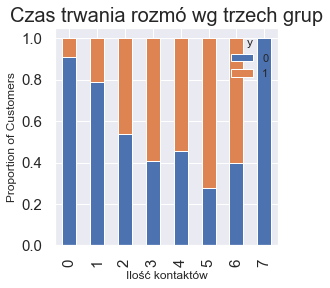

In [32]:
sns.set(style="white")
sns.set(rc={'figure.figsize':(4, 4)})
table=pd.crosstab(df['previous'],df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, fontsize=15)
plt.title('Czas trwania rozmó wg trzech grup', fontsize=20)
plt.xlabel('Ilość kontaktów')
plt.ylabel('Proportion of Customers')


Można obliczyć średni czas jednego kontaktu na klienta, który może się korelować ze zmienną y`

Zero znaczy że był jeden kontakt, jeden znaczy że jest 1 więcej niż standardowo. Zmieniam ten dziwny sposób liczenia kontaktów na 1 znaczy jedne kontakty, 2 znaczy 2 kontakty itd w kolumnie CC_previous

In [33]:
df['previous'] = df['previous']+1

In [34]:
df['AA_Średni czas kontaktu'] = df['duration']/df['previous']

Średni czas na jeden kontrakt

In [35]:
df.pivot_table(index=['duration','previous'], values='AA_Średni czas kontaktu').head(5)

AA_Średni czas kontaktu
duration previous                         
0.000000 1                        0.000000
0.016667 1                        0.016667
         2                        0.008333
         4                        0.004167
0.033333 1                        0.033333

Dzielimy na grupy i szukamy najbardziej efektywnego czasu komunikacji

In [36]:
df['AA_Średni czas kontaktu'] = np.round(df['AA_Średni czas kontaktu'], decimals=1)
df['CC_Średni czas jednego kontaktu_40G'] = pd.qcut(df['AA_Średni czas kontaktu'],40)

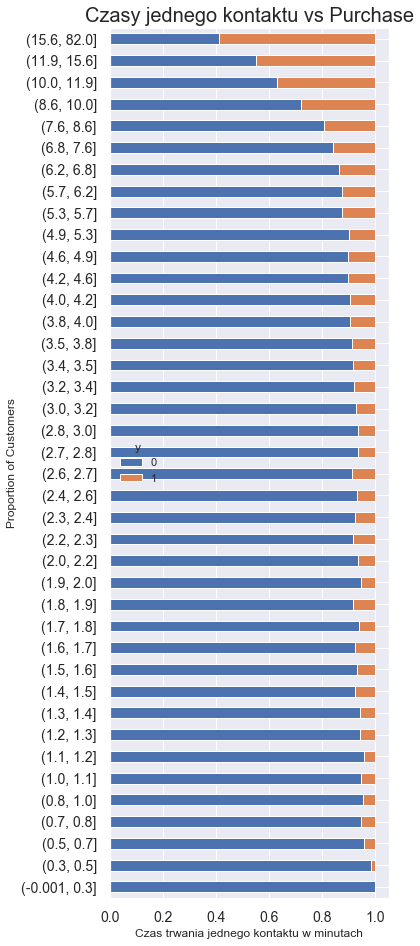

In [37]:
plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(5, 16)})
table=pd.crosstab(df['CC_Średni czas jednego kontaktu_40G'],df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, fontsize=14)
plt.title('Czasy jednego kontaktu vs Purchase', fontsize=20)
plt.xlabel('Czas trwania jednego kontaktu w minutach')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

In [38]:
lst = [df]
for column in lst:
    column.loc[column["AA_Średni czas kontaktu"] < 3,  "3Średni_czas_kontaktu"] = 'Rozmowa poniżej 3 minut'
    column.loc[(column["AA_Średni czas kontaktu"] >= 3) & (column["AA_Średni czas kontaktu"] <= 4), "3Średni_czas_kontaktu"] = 'Rozmowa 3-4 minut'
    column.loc[(column["AA_Średni czas kontaktu"] >= 4) & (column["AA_Średni czas kontaktu"] <= 6), "3Średni_czas_kontaktu"] = 'Rozmowa 4-6 minut'
    column.loc[column["AA_Średni czas kontaktu"] >= 6, "3Średni_czas_kontaktu"] = 'Rozmowa powyżej 6 minut'

Kasuje df['CC_Średni czas jednego kontaktu_40G']

In [39]:
del df['CC_Średni czas jednego kontaktu_40G']

Text(0,0.5,'Proportion of Customers')

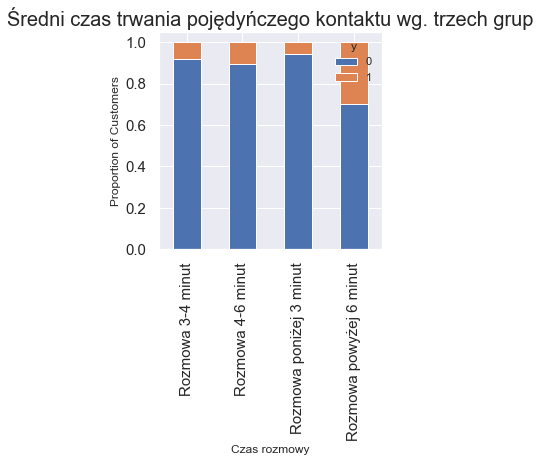

In [40]:
sns.set(style="white")
sns.set(rc={'figure.figsize':(4, 4)})
table=pd.crosstab(df['3Średni_czas_kontaktu'],df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, fontsize=15)
plt.title('Średni czas trwania pojędyńczego kontaktu wg. trzech grup', fontsize=20)
plt.xlabel('Czas rozmowy')
plt.ylabel('Proportion of Customers')

# emp.var.rate: korelacja do y = -0.298334
# emp.var.rate: wskaźnik zmienności zatrudnienia - wskaźnik kwartalny (liczbowy)
Wygląda na to czym częściej ktoś zmienia prace tym mniej chce założyć subskrypcję. Czyli należy szukać wśród ludzi o stałym zatrudnieniu

In [41]:
df['emp_var_rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp_var_rate, dtype: int64

Text(0,0.5,'Proportion of Customers')

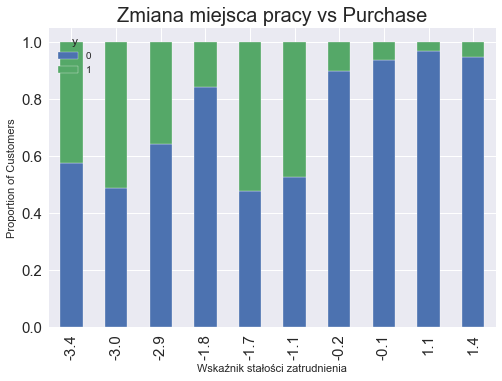

In [42]:
plt.style.use('seaborn')

table=pd.crosstab(df['emp_var_rate'],df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, fontsize=15)
plt.title('Zmiana miejsca pracy vs Purchase', fontsize=20)
plt.xlabel('Wskaźnik stałości zatrudnienia')
plt.ylabel('Proportion of Customers')


Zaokrąglam wskaźnik zatrudnienia do wartości całkowitych

In [43]:
df['emp_var_rate'] = np.round(df['emp_var_rate'], decimals=0)
df['emp_var_rate'].head(4)

0    1.0
1   -0.0
2   -2.0
3   -2.0
Name: emp_var_rate, dtype: float64

Text(0,0.5,'Proportion of Customers')

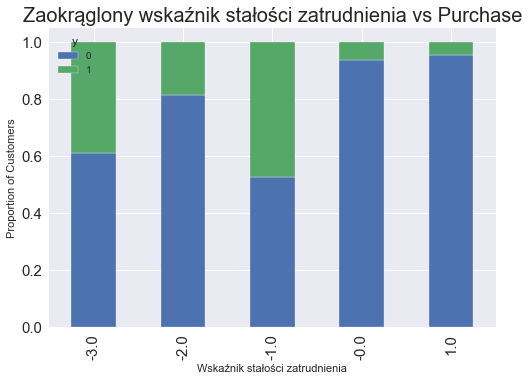

In [44]:
plt.style.use('seaborn')

table=pd.crosstab(df['emp_var_rate'],df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, fontsize=15)
plt.title('Zaokrąglony wskaźnik stałości zatrudnienia vs Purchase', fontsize=20)
plt.xlabel('Wskaźnik stałości zatrudnienia')
plt.ylabel('Proportion of Customers')


# euribor3 mln: Korelacja 0.3
##### stawka 3-miesięczna euribor - wskaźnik dzienny (liczbowy)
##### Stopa referencyjna dla kredytów w Euro. Stopa dla porzyczek i kredytów, służy do konstrukcji algorytmu oprocentowania.

In [45]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'AA5_Grup_wiekowych',
       'AA_3Czasy_kontaktu', 'AA_Średni czas kontaktu',
       '3Średni_czas_kontaktu'],
      dtype='object')

In [46]:
df.dtypes

age                          int64
job                         object
marital                     object
education                   object
default                     object
housing                     object
loan                        object
contact                     object
month                       object
day_of_week                 object
duration                   float64
campaign                     int64
pdays                        int64
previous                     int64
poutcome                    object
emp_var_rate               float64
cons_price_idx             float64
cons_conf_idx              float64
euribor3m                  float64
nr_employed                float64
y                            int64
AA5_Grup_wiekowych          object
AA_3Czasy_kontaktu          object
AA_Średni czas kontaktu    float64
3Średni_czas_kontaktu       object
dtype: object

In [47]:
df['euribor3m'] = np.round(df['euribor3m'], decimals=1)

Text(0,0.5,'Proportion of Customers')

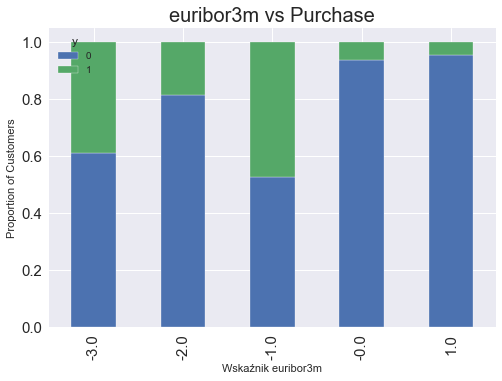

In [48]:
table=pd.crosstab(df['emp_var_rate'],df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, fontsize=15)
plt.title('euribor3m vs Purchase', fontsize=20)
plt.xlabel('Wskaźnik euribor3m')
plt.ylabel('Proportion of Customers')

# pdays:
pdays: liczba dni, które upłynęły od ostatniego kontaktu klienta z poprzedniej kampanii (numerycznie; 999 oznacza, że klient nie był wcześniej skontaktowano się)

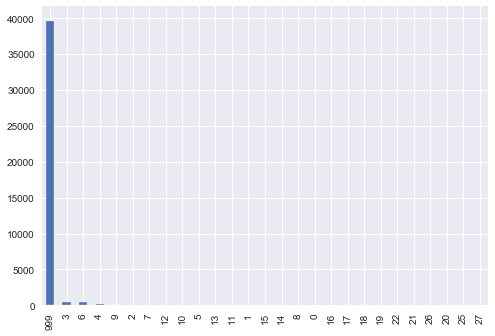

In [49]:
df['pdays'].value_counts().plot(kind='bar')

Text(0,0.5,'Proportion of Customers')

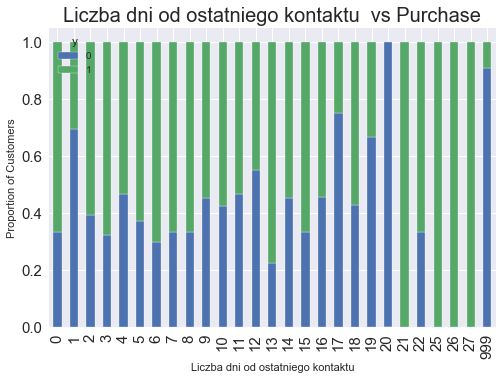

In [50]:
table=pd.crosstab(df['pdays'],df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, fontsize=15)
plt.title('Liczba dni od ostatniego kontaktu  vs Purchase', fontsize=20)
plt.xlabel('Liczba dni od ostatniego kontaktu')
plt.ylabel('Proportion of Customers')

# nr_employed: liczba zatrudnionych: liczba pracowników - wskaźnik kwartalny (liczbowy)

Text(0,0.5,'Proportion of Customers')

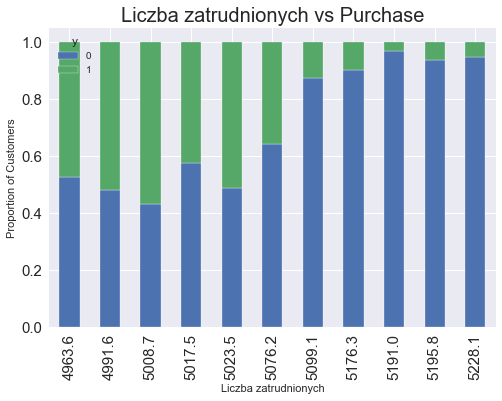

In [51]:
table=pd.crosstab(df['nr_employed'],df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, fontsize=15)
plt.title('Liczba zatrudnionych vs Purchase', fontsize=20)
plt.xlabel('Liczba zatrudnionych')
plt.ylabel('Proportion of Customers')

# Podsumowanie analizy zmiennych ciągłych

1. Utworzyłę nową zmienną dyskretną AA_3Czasy_kontaktu - 3 przedziały czasu kontaktu
2. Utworzyłę nową zmienną dyskretną AA5_Grup_wiekowych
3. Zmieniłem 'duration' z sekund na minuty
4. Zmieniłem liczenie dni w 'previous' jeden kontakt oznacza 1, dwa kontakty oznacza 2
5. Utworzyłem nową kategorię ciągłą 'AA_Średni czas kontaktu' 
6. Utworzyłem nową kategorię dyskretną "3Średni_czas_kontaktu"
7. Zaokrągliłem 'emp_var_rate'
8. Zaokrągliłem 'euribor3m'
9. Pozycje df['education'] -illiterate daje do unknown

df.dtypes

# WYKRES MACIERZOWY ZALEŻNOŚCI ZMIENNYCH CIĄGŁYCH

In [52]:
categorical_vars = df.describe(include=["object"]).columns
continuous_vars = df.describe().columns

In [53]:
continuous_vars

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'AA_Średni czas kontaktu'],
      dtype='object')

In [54]:
CORREL = df.corr().sort_values('y')
CORREL['y'].to_frame().sort_values('y')

,y
nr_employed,-0.354678
pdays,-0.324914
euribor3m,-0.306954
emp_var_rate,-0.298145
cons_price_idx,-0.136211
campaign,-0.066357
age,0.030399
cons_conf_idx,0.054878
previous,0.230181
AA_Średni czas kontaktu,0.340703


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


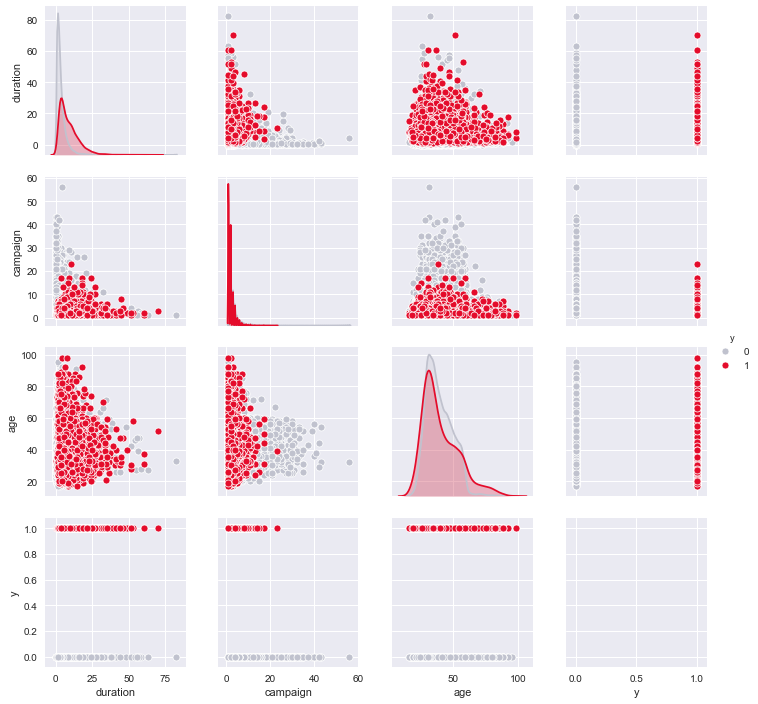

In [55]:
kot = ["#c0c2ce", "#e40c2b"]
sns.pairplot(data=df[['duration', 'campaign','age','y']], hue='y', dropna=True, palette=kot)

duration: czas trwania ostatniego kontaktu
campaign: liczba kontaktów wykonanych podczas tej kampanii i dla tego klienta

# 5. Analiza wpływu niezależnych zmiennych dyskretnych na zmienną zależną

# Zawód

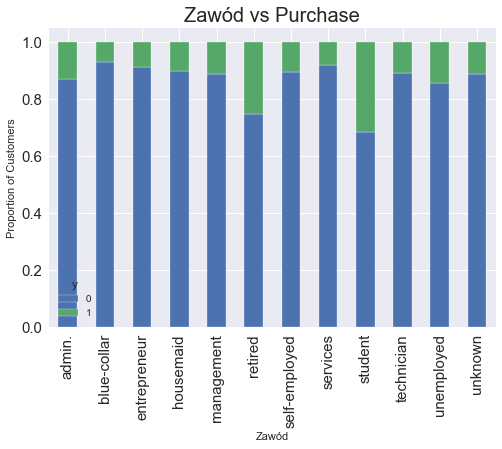

In [56]:
plt.style.use('seaborn')

table=pd.crosstab(df.job,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, fontsize=15)
plt.title('Zawód vs Purchase', fontsize=20)
plt.xlabel('Zawód')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

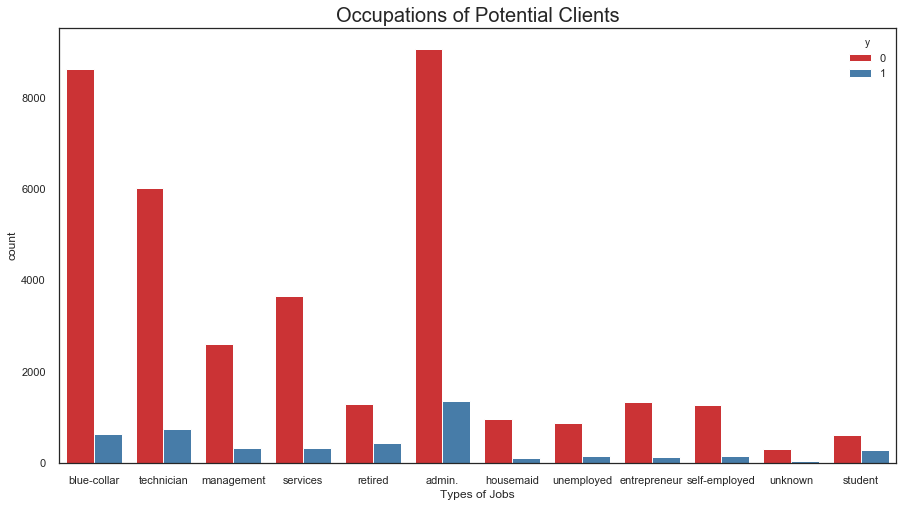

In [57]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(x="job", hue='y',data=df, palette="Set1")
ax.set_title("Occupations of Potential Clients", fontsize=20)
ax.set_xlabel("Types of Jobs")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5,1,'Wiek klienta banku')

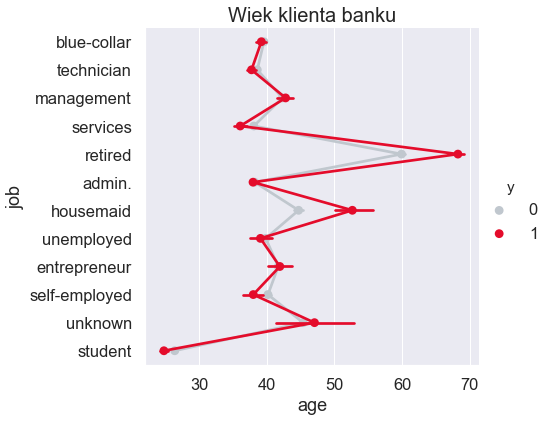

In [58]:
sns.set(font_scale=1.5)
kot = ["#c0c7ce", "#e40c2b"]
sns.factorplot('age','job',hue='y',data=df , palette=kot, height=6, aspect=1.2)

import matplotlib.pyplot as plt
plt.title('Wiek klienta banku', fontsize=20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5,1,'Średni czas kontaktu w minutach')

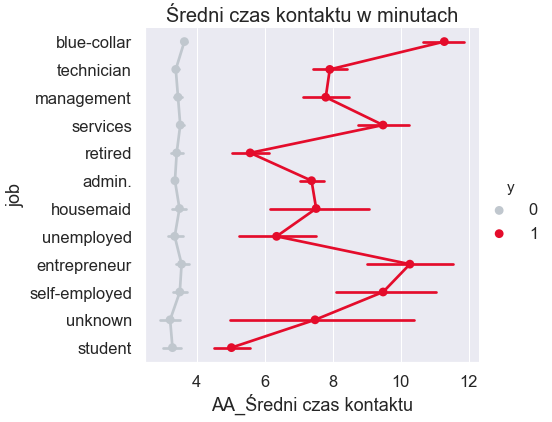

In [59]:
sns.set(font_scale=1.5)
sns.factorplot('AA_Średni czas kontaktu','job',hue='y',data=df , palette=kot, height=6, aspect=1.2)

import matplotlib.pyplot as plt
plt.title('Średni czas kontaktu w minutach', fontsize=20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5,1,'Liczba dni od ostaniego kontaktu (?)')

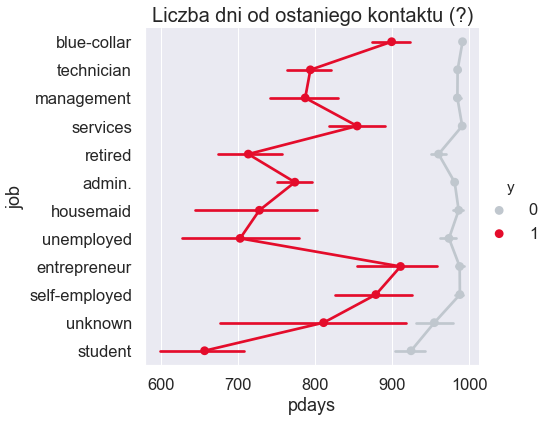

In [60]:
sns.set(font_scale=1.5)
sns.factorplot('pdays','job',hue='y',data=df , palette=kot, height=6, aspect=1.2)
import matplotlib.pyplot as plt
plt.title('Liczba dni od ostaniego kontaktu (?)', fontsize=20)

In [61]:
sns.set(font_scale=1.5)
df['AA_pdays'] = df['pdays'].apply(lambda x: 0 if x == 999 else x)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5,1,'Liczba dni od ostaniego kontaktu')

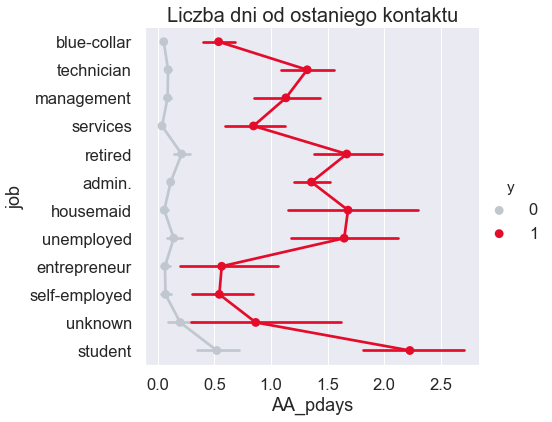

In [62]:
sns.set(font_scale=1.5)
sns.factorplot('AA_pdays','job',hue='y',data=df , palette=kot, height=6, aspect=1.2)

import matplotlib.pyplot as plt
plt.title('Liczba dni od ostaniego kontaktu', fontsize=20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5,1,'Sytuacja na rynku pracy')

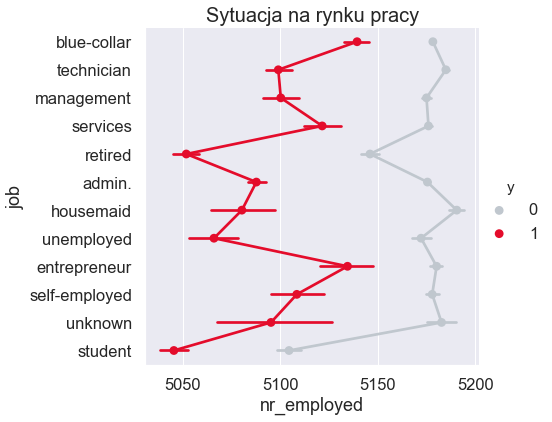

In [63]:
sns.factorplot('nr_employed','job',hue='y',data=df , palette=kot, height=6, aspect=1.2)
import matplotlib.pyplot as plt
plt.title('Sytuacja na rynku pracy', fontsize=20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5,1,'Liczba kontaktów  WYKRES NIC NIE POKAZUJE')

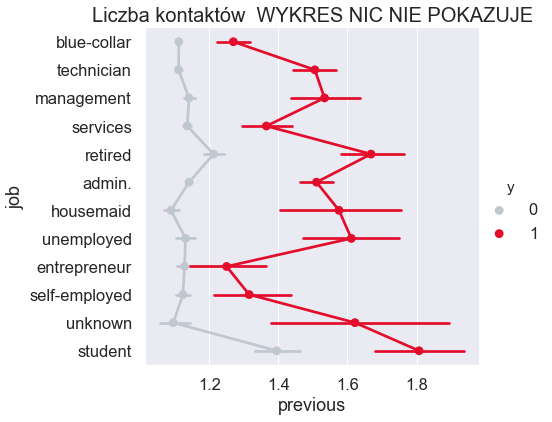

In [64]:
sns.set(font_scale=1.5)
sns.factorplot('previous','job',hue='y',data=df , palette=kot, height=6, aspect=1.2)
import matplotlib.pyplot as plt
plt.title('Liczba kontaktów  WYKRES NIC NIE POKAZUJE', fontsize=20)

previous: liczba kontaktów wykonanych przed tą kampanią i dla tego klienta (numerycznie)

In [65]:
df['previous'].value_counts()

1    35563
2     4561
3      754
4      216
5       70
6       18
7        5
8        1
Name: previous, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5,1,'Liczba kontaktów powyżej dwóch')

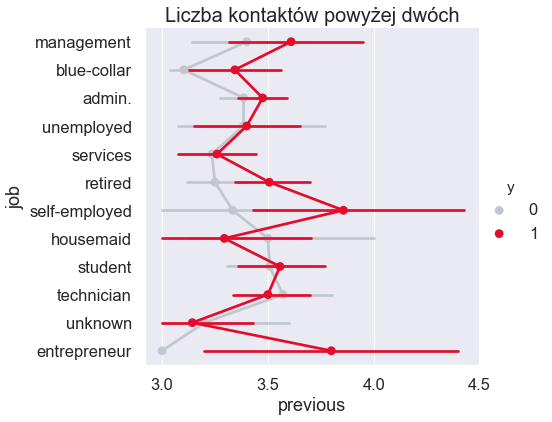

In [66]:

KOT = df[df['previous']>2]
sns.factorplot('previous','job',hue='y',data=KOT , palette=kot, height=6, aspect=1.2)
sns.set(font_scale=1.5)

import matplotlib.pyplot as plt
plt.title('Liczba kontaktów powyżej dwóch', fontsize=20)

previous: liczba kontaktów wykonanych przed tą kampanią i dla tego klienta (numerycz

# 6. Tworzenie zmiennych zastępczych dla zmiennych kategorycznych


In [67]:
categorical_vars = df.describe(include=["object"]).columns
continuous_vars = df.describe().columns

In [68]:
# zmienne dyskretne
categorical_vars

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'AA5_Grup_wiekowych',
       'AA_3Czasy_kontaktu', '3Średni_czas_kontaktu'],
      dtype='object')

In [69]:
# zmienne ciągłe
continuous_vars

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'AA_Średni czas kontaktu', 'AA_pdays'],
      dtype='object')

In [70]:
data_dummies_df = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

Każda wartość niecyfrowa teraz jest pokazana jako wariant. Tz jeżeli była kolumna płeć zawierająca Kobieta, Mężczyzna to teraz są kolumny płećKobieta, płećMężczyzna, a w kolumnach jest albo 0 albo 1

In [71]:
data_dummies_df.sample(5)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,poutcome_success,"AA5_Grup_wiekowych_(31.0, 35.0]","AA5_Grup_wiekowych_(35.0, 41.0]","AA5_Grup_wiekowych_(41.0, 49.0]","AA5_Grup_wiekowych_(49.0, 98.0]",AA_3Czasy_kontaktu_Rozmowa poniżej 3 minut,AA_3Czasy_kontaktu_Rozmowa powyżej 6 minut,3Średni_czas_kontaktu_Rozmowa 4-6 minut,3Średni_czas_kontaktu_Rozmowa poniżej 3 minut,3Średni_czas_kontaktu_Rozmowa powyżej 6 minut
27330,32,0.983333,1,999,1,1.0,93.918,-42.7,5.0,5228.1,...,0,1,0,0,0,1,0,0,1,0
32815,57,9.100000,12,999,1,1.0,93.994,-36.4,4.9,5191.0,...,0,0,0,0,1,0,1,0,0,1
7676,29,1.900000,1,999,1,-0.0,93.200,-42.0,4.1,5195.8,...,0,0,0,0,0,1,0,0,1,0
26547,26,3.300000,5,999,1,1.0,94.465,-41.8,5.0,5228.1,...,0,0,0,0,0,0,0,0,0,0
25263,41,4.950000,1,999,2,-0.0,93.200,-42.0,4.2,5195.8,...,0,0,1,0,0,0,0,0,1,0


In [72]:
data_dummies_df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'AA_Średni czas kontaktu', 'AA_pdays', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonex

# 7. Macierz korelacji categorical_dummies ze zmienną wynikową

In [73]:
CORREL = data_dummies_df.corr().sort_values('y')
CORREL['y'].to_frame().sort_values('y')

,y
nr_employed,-0.354678
pdays,-0.324914
euribor3m,-0.306954
emp_var_rate,-0.298145
AA_3Czasy_kontaktu_Rozmowa poniżej 3 minut,-0.270507
poutcome_nonexistent,-0.193507
3Średni_czas_kontaktu_Rozmowa poniżej 3 minut,-0.187999
contact_telephone,-0.144773
cons_price_idx,-0.136211
month_may,-0.108271


Text(0,0.5,'Zmienne nezależne ciągłe')

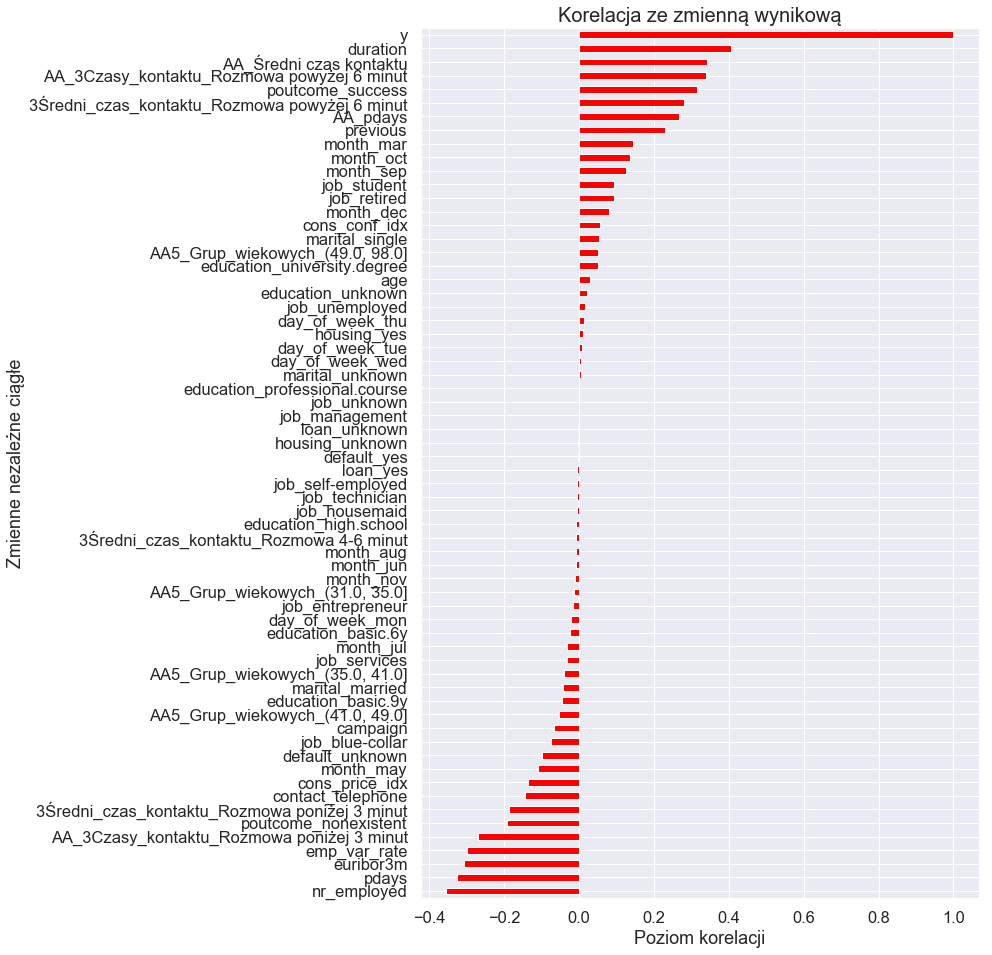

In [74]:
plt.figure(figsize=(10,16))
CORREL['y'].plot(kind='barh', color='red')
plt.title('Korelacja ze zmienną wynikową', fontsize=20)
plt.xlabel('Poziom korelacji')
plt.ylabel('Zmienne nezależne ciągłe')

# 5.7 Badanie poziomu zbilansowania zbioru

Oversampling odbywa się na zbiorze treningowym więc najpierw trzeba podzielić zbiór na treningowy i testowy

In [75]:
y = data_dummies_df['y']
X = data_dummies_df.drop('y', axis=1) 

In [76]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.33, stratify = y, random_state = 148)


In [77]:
print ('Zbiór X treningowy: ',Xtrain.shape)
print ('Zbiór X testowy:    ', Xtest.shape)
print ('Zbiór y treningowy: ', ytrain.shape)
print ('Zbiór y testowy:    ', ytest.shape)

Zbiór X treningowy:  (27595, 63)
Zbiór X testowy:     (13593, 63)
Zbiór y treningowy:  (27595,)
Zbiór y testowy:     (13593,)


### Analiza poziomu zbilansowania zmiennej wynikowej


In [78]:
df.y.value_counts(dropna = False, normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [79]:
print("ytrain = 0: ", sum(ytrain == 0))
print("ytrain = 1: ", sum(ytrain == 1))

ytrain = 0:  24486
ytrain = 1:  3109


In [80]:
Proporcja = sum(ytrain == 0) / sum(ytrain == 1) 
Proporcja = np.round(Proporcja, decimals=0)
Proporcja = Proporcja.astype(int)
Proporcja

8

Na jedną daną sybskrypcje przypada 8 nieprzedłużonych subskrypcji. Powiększamy liczbę próbek niezależnych.

In [81]:
ytrain_pos_OVSA = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
ytrain_pos_OVSA.count()


24872

Powiękzyliśmy ilość zmiennych gdzie wynik przedłużenia subskrypcji jest równy 1. Teraz mamy tą samą liczbę wierszy zmiennych wynikowych i zmiennych niezależnych.
Teraz wprowadzamy nowe, dodatkowe zmienne 1 do zbioru treningowego.


In [82]:
Xtrain_pos_OVSA = pd.concat([Xtrain.loc[ytrain==1, :]] * Proporcja, axis = 0)
ytrain_pos_OVSA.count()

24872

In [83]:
ytrain_OVSA = pd.concat([ytrain, ytrain_pos_OVSA], axis = 0).reset_index(drop = True)
Xtrain_OVSA = pd.concat([Xtrain, Xtrain_pos_OVSA], axis = 0).reset_index(drop = True)

In [84]:
print("ilość elementów w zbiorze Xtrain:     ", Xtrain.age.count())
print("ilość elementów w zbiorze Xtrain_OVSA: ", Xtrain_OVSA.age.count())
print("ilość elementów w zbiorze ytrain:     ", ytrain.count())
print("ilość elementów w zbiorze ytrain_OVSA: ", ytrain_OVSA.count())

ilość elementów w zbiorze Xtrain:      27595
ilość elementów w zbiorze Xtrain_OVSA:  52467
ilość elementów w zbiorze ytrain:      27595
ilość elementów w zbiorze ytrain_OVSA:  52467


# Model regresji logistycznej po oversampling

In [85]:
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = 5, cv=2)

LR_Grid.fit(Xtrain_OVSA, ytrain_OVSA) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=True),
             iid='warn', n_jobs=5,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

# Ocena modelu regresji logistycznej po oversampling

In [86]:
ypred_OVS = LR_Grid.predict(Xtest)

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

co_matrix = metrics.confusion_matrix(ytest, ypred_OVS)
co_matrix

array([[10099,  1963],
       [  155,  1376]], dtype=int64)

In [87]:
print(classification_report(ytest, ypred_OVS)) 

              precision    recall  f1-score   support

           0       0.98      0.84      0.91     12062
           1       0.41      0.90      0.57      1531

    accuracy                           0.84     13593
   macro avg       0.70      0.87      0.74     13593
weighted avg       0.92      0.84      0.87     13593



In [88]:
print("Accuracy:    ",np.round(metrics.accuracy_score(ytest, ypred_OVS), decimals=2))
print("Precision:   ",np.round(metrics.precision_score(ytest, ypred_OVS), decimals=2))
print("Recall:      ",np.round(metrics.recall_score(ytest, ypred_OVS), decimals=2))
print("F1 score:    ",np.round(metrics.f1_score(ytest, ypred_OVS), decimals=2))

Accuracy:     0.84
Precision:    0.41
Recall:       0.9
F1 score:     0.57


# Model ma doskonałe własności dla przewidywania zakupu kredytu, pokazuje to recall y=1

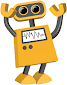

### Poszukiwanie najlepszych predyktorów w modalu regresji logistycznej RFE

In [89]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(Xtrain_OVSA, ytrain_OVSA.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[False False False False  True  True False False  True False  True False
  True False False False  True  True False  True False  True  True False
 False False False False False False  True False  True False False False
 False False False False  True False False  True  True False  True  True
 False False False False False  True False False False False  True  True
 False False False]
[42 18 30 41  1  1 35 38  1 37  1 39  1  5 25 26  1  1  6  1 32  1  1 29
 24 14 40 15 31 11  1 10  1 43 23 44 28 19  7  8  1  9 16  1  1 36  1  1
 22 21 34 33 12  1  4  3  2 27  1  1 20 13 17]


In [90]:
Xtrain_OVSA.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'AA_Średni czas kontaktu', 'AA_pdays', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexisten

In [91]:
rfe.ranking_

array([42, 18, 30, 41,  1,  1, 35, 38,  1, 37,  1, 39,  1,  5, 25, 26,  1,
        1,  6,  1, 32,  1,  1, 29, 24, 14, 40, 15, 31, 11,  1, 10,  1, 43,
       23, 44, 28, 19,  7,  8,  1,  9, 16,  1,  1, 36,  1,  1, 22, 21, 34,
       33, 12,  1,  4,  3,  2, 27,  1,  1, 20, 13, 17])

In [92]:
rfe.support_

array([False, False, False, False,  True,  True, False, False,  True,
       False,  True, False,  True, False, False, False,  True,  True,
       False,  True, False,  True,  True, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False,  True,  True, False, False, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False])

In [93]:
position = list(map(float, rfe.ranking_))
support = list(map(float, rfe.support_))
name = list(X.columns)

In [94]:
s1=pd.Series(name,name='name')
s2=pd.Series(support,name='support')
s3=pd.Series(position,name='position')
RFE_list = pd.concat([s1,s2,s3], axis=1)

RFE_list

,name,support,position
0,age,0.0,42.0
1,duration,0.0,18.0
2,campaign,0.0,30.0
3,pdays,0.0,41.0
4,previous,1.0,1.0
5,emp_var_rate,1.0,1.0
6,cons_price_idx,0.0,35.0
7,cons_conf_idx,0.0,38.0
8,euribor3m,1.0,1.0
9,nr_employed,0.0,37.0


# Najlepsze zmienne predykcyjne według RFE

In [95]:
RFE_list[RFE_list['support']==1]

,name,support,position
4,previous,1.0,1.0
5,emp_var_rate,1.0,1.0
8,euribor3m,1.0,1.0
10,AA_Średni czas kontaktu,1.0,1.0
12,job_blue-collar,1.0,1.0
16,job_retired,1.0,1.0
17,job_self-employed,1.0,1.0
19,job_student,1.0,1.0
21,job_unemployed,1.0,1.0
22,job_unknown,1.0,1.0


# MODEL BEZ ZBILANSOWANIA ZBIORÓW -----------------------------------

Skalowanie standardowe tylko dla wartości dyskretnych

Wybieram kolumny tekstowe, dyskretne, do głębszej analizy. Lepsze było to wybieranie dyskretne i ciągłe.

In [96]:
categorical_vars

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'AA5_Grup_wiekowych',
       'AA_3Czasy_kontaktu', '3Średni_czas_kontaktu'],
      dtype='object')

In [97]:
df[categorical_vars] = df[categorical_vars].apply(LabelEncoder().fit_transform)

In [98]:
df_num = df[categorical_vars].head()

In [99]:
y = df['y']
X = df.drop('y', axis=1) 

In [100]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.33, stratify = y, random_state = 148)

wielkości zbiorów

In [101]:
print ('Zbiór X treningowy: ',Xtrain.shape)
print ('Zbiór X testowy:    ', Xtest.shape)
print ('Zbiór y treningowy: ', ytrain.shape)
print ('Zbiór y testowy:    ', ytest.shape)

Zbiór X treningowy:  (27595, 25)
Zbiór X testowy:     (13593, 25)
Zbiór y treningowy:  (27595,)
Zbiór y testowy:     (13593,)


In [102]:
Xtrain.head(4)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,AA5_Grup_wiekowych,AA_3Czasy_kontaktu,AA_Średni czas kontaktu,3Średni_czas_kontaktu,AA_pdays
24697,49,1,1,2,1,0,0,1,4,4,...,1.0,94.465,-41.8,5.0,5228.1,3,0,3.7,0,0
25855,38,9,0,5,1,0,0,0,1,1,...,1.0,93.444,-36.1,5.0,5228.1,2,1,2.1,2,0
23236,42,0,0,5,0,0,0,1,4,0,...,1.0,94.465,-41.8,5.0,5228.1,3,1,0.4,2,0
13812,58,1,1,4,1,0,2,1,4,2,...,1.0,94.465,-41.8,4.9,5228.1,4,1,0.4,2,0


# Logistic Regression na zmiennych zcyfryzowanych bez oversampling

In [103]:
from sklearn.model_selection import GridSearchCV

Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = 5, cv=2)

LR_Grid.fit(Xtrain, ytrain) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=True),
             iid='warn', n_jobs=5,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

#### Blok oceny jakości modelu Logistic Regression

In [104]:
# Podstawienie do wzoru
ypred = LR_Grid.predict(Xtest) 

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

co_matrix = metrics.confusion_matrix(ytest, ypred)
co_matrix

array([[11753,   309],
       [  995,   536]], dtype=int64)

In [105]:
print(classification_report(ytest, ypred)) 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12062
           1       0.63      0.35      0.45      1531

    accuracy                           0.90     13593
   macro avg       0.78      0.66      0.70     13593
weighted avg       0.89      0.90      0.89     13593



In [106]:
print("Accuracy:   ",np.round(metrics.accuracy_score(ytest, ypred), decimals=2))
print("Precision:  ",np.round(metrics.precision_score(ytest, ypred), decimals=2))
print("Recall:     ",np.round(metrics.recall_score(ytest, ypred), decimals=2))
print("F1 score:   ",np.round(metrics.f1_score(ytest, ypred), decimals=2))

Accuracy:    0.9
Precision:   0.63
Recall:      0.35
F1 score:    0.45


## Słabo wyszło recall a właśnie o recall dla 1 nam chodzi 
## Model nie jest dobry!

Model nie jest dobry!!
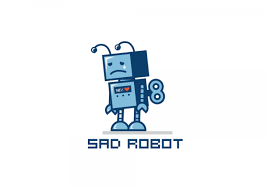

## -------------------Analiza poziomu zbilansowania zmiennej wynikowej -------------------------------

In [107]:
df.y.value_counts(dropna = False, normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [108]:
from sklearn.linear_model import LogisticRegression

print("ytrain = 0: ", sum(ytrain == 0))
print("ytrain = 1: ", sum(ytrain == 1))

ytrain = 0:  24486
ytrain = 1:  3109



obliczamy ile jest 0 na jedną 1 w kolumnie wynikowej

In [109]:
Proporcja = sum(ytrain == 0) / sum(ytrain == 1) 
Proporcja = np.round(Proporcja, decimals=0)
Proporcja = Proporcja.astype(int)
Proporcja

8

Na jedną daną sybskrypcje przypada 8 nieprzedłużonych subskrypcji. Powiększamy liczbę próbek niezależnych.

In [110]:
ytrain_pos_OVS = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
ytrain_pos_OVS.count()

24872

Ilość zmiennych wynikowych: (1) zwiększyła się do liczby 24872 Mamy już wektor zmiennych wynikowych y, teraz trzeba zwiększyć liczbę zmiennych niezależnych

Powiększamy liczbę próbek zmiennych niezależnych X

In [111]:
Xtrain_pos_OVS = pd.concat([Xtrain.loc[ytrain==1, :]] * Proporcja, axis = 0)

In [112]:
Xtrain_pos_OVS.age.count()

24872

Powiękzyliśmy ilość zmiennych gdzie wynik przedłużenia subskrypcji jest równy 1. Teraz mamy tą samą liczbę wierszy zmiennych wynikowych i zmiennych niezależnych.
Teraz wprowadzamy nowe, dodatkowe zmienne 1 do zbioru treningowego.

In [113]:
ytrain_OVS = pd.concat([ytrain, ytrain_pos_OVS], axis = 0).reset_index(drop = True)
Xtrain_OVS = pd.concat([Xtrain, Xtrain_pos_OVS], axis = 0).reset_index(drop = True)

Sprawdzamy ilość wierszy w zbiorach przed i po oversampling

In [114]:
print("ilość elementów w zbiorze Xtrain:     ", Xtrain.age.count())
print("ilość elementów w zbiorze Xtrain_OVS: ", Xtrain_OVS.age.count())
print("ilość elementów w zbiorze ytrain:     ", ytrain.count())
print("ilość elementów w zbiorze ytrain_OVS: ", ytrain_OVS.count())

ilość elementów w zbiorze Xtrain:      27595
ilość elementów w zbiorze Xtrain_OVS:  52467
ilość elementów w zbiorze ytrain:      27595
ilość elementów w zbiorze ytrain_OVS:  52467


Teraz podstawiamy nowy zbiór testowy oversampling do siatki grid według tej same formuły, którą użyliśmy wcześniej.

In [115]:
Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = 5, cv=2)

LR_Grid.fit(Xtrain_OVS, ytrain_OVS) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=True),
             iid='warn', n_jobs=5,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [116]:
ypred_OVS = LR_Grid.predict(Xtest)

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

co_matrix = metrics.confusion_matrix(ytest, ypred_OVS)
co_matrix

array([[10135,  1927],
       [  185,  1346]], dtype=int64)

In [117]:
print(classification_report(ytest, ypred_OVS)) 

              precision    recall  f1-score   support

           0       0.98      0.84      0.91     12062
           1       0.41      0.88      0.56      1531

    accuracy                           0.84     13593
   macro avg       0.70      0.86      0.73     13593
weighted avg       0.92      0.84      0.87     13593



In [118]:
print("Accuracy:    ",np.round(metrics.accuracy_score(ytest, ypred_OVS), decimals=2))
print("Precision:   ",np.round(metrics.precision_score(ytest, ypred_OVS), decimals=2))
print("Recall:      ",np.round(metrics.recall_score(ytest, ypred_OVS), decimals=2))
print("F1 score:    ",np.round(metrics.f1_score(ytest, ypred_OVS), decimals=2))

Accuracy:     0.84
Precision:    0.41
Recall:       0.88
F1 score:     0.56


Wynik modelu Logistic Regression przed Oversampling
- Accuracy: 0.9
- Precision: 0.63
- Recall: 0.35
- F1 score: 0.45

Wynik kodelu po Oversampling
- Accuracy: 0.84
- Precision: 0.41
- Recall: 0.88
- F1 score: 0.56


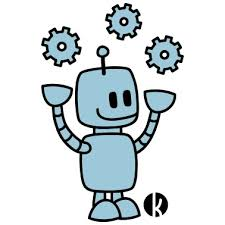

# Random Forest Classifier bez oversampling

In [119]:
from sklearn.ensemble import RandomForestClassifier

forestVC = RandomForestClassifier (random_state = 1, 
                                  n_estimators = 750, 
                                  max_depth = 15, 
                                  min_samples_split = 5, min_samples_leaf = 1) 
modelF = forestVC.fit(Xtrain, ytrain)
y_predF = modelF.predict(Xtest)

##### Blok oceny jakości modelu Random Forest Classifier

In [120]:
ypred = modelF.predict(Xtest)

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

co_matrix = metrics.confusion_matrix(ytest, ypred)
co_matrix

array([[11622,   440],
       [  749,   782]], dtype=int64)

In [121]:
print(classification_report(ytest, ypred)) 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12062
           1       0.64      0.51      0.57      1531

    accuracy                           0.91     13593
   macro avg       0.79      0.74      0.76     13593
weighted avg       0.91      0.91      0.91     13593



In [122]:
print("Accuracy:   ",np.round(metrics.accuracy_score(ytest, ypred), decimals=2))
print("Precision:  ",np.round(metrics.precision_score(ytest, ypred), decimals=2))
print("Recall:     ",np.round(metrics.recall_score(ytest, ypred), decimals=2))
print("F1 score:   ",np.round(metrics.f1_score(ytest, ypred), decimals=2))

Accuracy:    0.91
Precision:   0.64
Recall:      0.51
F1 score:    0.57


# Random Forest Classifier z oversampling


Na jedną daną sybskrypcje przypada 8 nieprzedłużonych subskrypcji. Powiększamy liczbę próbek niezależnych.

In [123]:
ytrain_pos_OVS = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
ytrain_pos_OVS.count()

24872

Ilość zmiennych wynikowych: (1) zwiększyła się do liczby 24872 Mamy już wektor zmiennych wynikowych y, teraz trzeba zwiększyć liczbę zmiennych niezależnych

Powiększamy liczbę próbek zmiennych niezależnych X

In [124]:
Xtrain_pos_OVS = pd.concat([Xtrain.loc[ytrain==1, :]] * Proporcja, axis = 0)

In [125]:
Xtrain_pos_OVS.age.count()

24872

In [126]:
ytrain_OVS = pd.concat([ytrain, ytrain_pos_OVS], axis = 0).reset_index(drop = True)
Xtrain_OVS = pd.concat([Xtrain, Xtrain_pos_OVS], axis = 0).reset_index(drop = True)

In [127]:
print("ilość elementów w zbiorze Xtrain:     ", Xtrain.age.count())
print("ilość elementów w zbiorze Xtrain_OVS: ", Xtrain_OVS.age.count())
print("ilość elementów w zbiorze ytrain:     ", ytrain.count())
print("ilość elementów w zbiorze ytrain_OVS: ", ytrain_OVS.count())

ilość elementów w zbiorze Xtrain:      27595
ilość elementów w zbiorze Xtrain_OVS:  52467
ilość elementów w zbiorze ytrain:      27595
ilość elementów w zbiorze ytrain_OVS:  52467



Teraz podstawiamy nowy zbiór testowy oversampling do siatki grid według tej same formuły, którą użyliśmy wcześniej.

In [128]:
forestVC = RandomForestClassifier (random_state = 1, 
                                  n_estimators = 750, 
                                  max_depth = 15, 
                                  min_samples_split = 5, min_samples_leaf = 1) 
modelF = forestVC.fit(Xtrain_OVS, ytrain_OVS)

In [129]:
ypred = modelF.predict(Xtest)

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

co_matrix = metrics.confusion_matrix(ytest, ypred)
co_matrix

array([[10923,  1139],
       [  294,  1237]], dtype=int64)

In [130]:
print(classification_report(ytest, ypred)) 

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     12062
           1       0.52      0.81      0.63      1531

    accuracy                           0.89     13593
   macro avg       0.75      0.86      0.79     13593
weighted avg       0.92      0.89      0.90     13593



In [131]:
print("Accuracy:    ",np.round(metrics.accuracy_score(ytest, ypred), decimals=2))
print("Precision:   ",np.round(metrics.precision_score(ytest, ypred), decimals=2))
print("Recall:      ",np.round(metrics.recall_score(ytest, ypred), decimals=2))
print("F1 score:    ",np.round(metrics.f1_score(ytest, ypred), decimals=2))

Accuracy:     0.89
Precision:    0.52
Recall:       0.81
F1 score:     0.63


Wynik modelu Random Forest Classifier przed Oversampling
- Accuracy: 0.91
- Precision: 0.64
- Recall: 0.51
- F1 score: 0.57

Wynik kodelu po Oversampling
- Accuracy: 0.89
- Precision: 0.52
- Recall: 0.81
- F1 score: 0.63

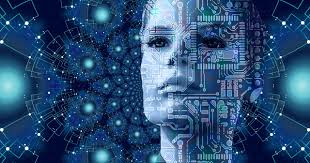

# Cel zadania
1. zaproponują grupy klientów (segmenty), dla których Dep. Marketingu opracuje odrębne skrypty rozmów i argumenty sprzedażowe

2. przygotują model predykcyjny, na podstawie którego do kolejnej akcji sprzedażowej zostaną wyselekcjonowani klienci cechujący się najwyższym prawdopodobieństwem kupna produktu.

# ODPOWIEDŹ NA PIERWSZE i DRUGIE PYTANIE 
Na podstawie Modelu regresji logistycznej o doskonałych właściwościach predykcyjnych: 
- Accuracy:     0.84
- Precision:    0.41
- Recall:       0.9
- F1 score:     0.57

                precision    recall  f1-score   support
           0       0.98      0.84      0.91     12062
           1       0.41      0.90      0.57      1531

Algorytm eliminacji niezależnych zmiennych nieistotnych RFE (Recursive Feature Elimination) pozostawił następujące zmienne jako mające znaczenie w procesie planowania. Przerdstawione zmienne według algotymu są istotnymi predyktorami dla zmiennej endogenicznej.  



In [132]:
RFE_list[RFE_list['support']==1]

,name,support,position
4,previous,1.0,1.0
5,emp_var_rate,1.0,1.0
8,euribor3m,1.0,1.0
10,AA_Średni czas kontaktu,1.0,1.0
12,job_blue-collar,1.0,1.0
16,job_retired,1.0,1.0
17,job_self-employed,1.0,1.0
19,job_student,1.0,1.0
21,job_unemployed,1.0,1.0
22,job_unknown,1.0,1.0


##### Miesiące przewidywalne przez model
- Sprzedaż prowadzona w miesiącach: grudzień, marzec, maj, wrzesień, październik

##### Klienci przewidywalni przez model
- Klienci według zawodów: blue-collar, retired, student, unemployed, self-employed (unknown odrzucamy)
- Klienci według wykształcenia: university.degree (tylko tacy są przewidywalni przez model)

#### Czynniki makroekonomiczne ważne do podjęcia decyzji o wzięciu kredytu:

- euribor3m: stawka 3-miesięczna euribor - wskaźnik dzienny (liczbowy) ważny składnik tworzenia algorytmu odestkowego
- emp_var_rate: wskaźnik zmienności zatrudnienia - wskaźnik kwartalny (liczbowy) czyli ile razy klient zmieniał pracę

##### wskazówki dla pracowników sprzerdaży banku
- previous: liczba kontaktów wykonanych przed tą kampanią i dla tego klienta (numerycznie)
- AA_Średni czas kontaktu
- AA_3Czasy_kontaktu_Rozmowa poniżej 3 minut
- AA_3Czasy_kontaktu_Rozmowa powyżej 6 minut

##### Sukces rodzi sukces
- poutcome_success - sukces ostatniej kampanii marketingowej, poutcome: wynik poprzedniej kampanii marketingowej (kategorycznie: „porażka”, „nieistniejąca”, „sukces”)


### W TYM KIERUNKU POWINNY BYĆ PROWADZONE BADANIA

Obszary analiz dla działu marketingu zostały wskazane w odpowiedzi powyżej.

Ogromne możliwości metod badawczych zostały przedstawione w początkowych rozdziałach, szczególnie w rozdziale:
5. Analiza wpływu niezależnych zmiennych dyskretnych na zmienną zależną 
oraz 
- WYKRES MACIERZOWY ZALEŻNOŚCI ZMIENNYCH CIĄGŁYCH


Daje to ogromną potencjalną liczbę konfiguracji i możliwość poboru danych z innych powiązanych baz!

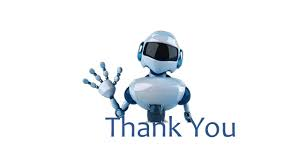